In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('../data/curated/future_rent_prediction.csv')

In [70]:
df.head()

,Date,Predicted_Median,suburb,type
0,2023-04-01,289.404641,Altona,1 bedroom flat
1,2023-07-01,288.943436,Altona,1 bedroom flat
2,2023-10-01,290.690671,Altona,1 bedroom flat
3,2024-01-01,291.645296,Altona,1 bedroom flat
4,2024-04-01,292.001886,Altona,1 bedroom flat


In [71]:
df = df.sort_values(['suburb', 'type', 'Date'])

In [72]:
result = df.groupby(['suburb', 'type']).apply(
    lambda x: ((x['Predicted_Median'].iloc[-1] - x['Predicted_Median'].iloc[0]) / x['Predicted_Median'].iloc[0]) * 100
)

# Convert result to DataFrame for readability
result = result.reset_index(name='Rent_Diff')

print(result)

      suburb             type  Rent_Diff
0     Altona   1 bedroom flat   2.156154
1     Altona   2 bedroom flat   8.824588
2     Altona  2 bedroom house   3.628110
3     Altona   3 bedroom flat   4.536719
4     Altona  3 bedroom house  13.610243
..       ...              ...        ...
311  Wodonga  2 bedroom house   0.421169
312  Wodonga   3 bedroom flat   8.168028
313  Wodonga  3 bedroom house  13.310973
314  Wodonga  4 bedroom house  13.841390
315  Wodonga   All properties  10.689095

[316 rows x 3 columns]


/var/folders/_7/sr3p02zn35v2xg1fm8dsbz6c0000gn/T/ipykernel_11743/3410902719.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby(['suburb', 'type']).apply(


In [73]:
# Find the top 10 suburb with the highest increase in rent
result.nlargest(10, 'Rent_Diff')

,suburb,type,Rent_Diff
195,Morwell,3 bedroom house,33.086155
197,Morwell,All properties,27.958430
151,Frankston,1 bedroom flat,25.302849
103,Cranbourne,4 bedroom house,25.146649
309,Wodonga,1 bedroom flat,24.096713
310,Wodonga,2 bedroom flat,22.852851
153,Frankston,2 bedroom house,22.454826
69,Boronia,All properties,21.801400
43,Benalla,2 bedroom flat,21.682668
104,Cranbourne,All properties,19.266397


In [74]:
# Find the top 10 suburb with the lowest increase in rent
result.nsmallest(10, 'Rent_Diff')

,suburb,type,Rent_Diff
184,Melton,1 bedroom flat,-7.322728
276,Toorak,2 bedroom house,-4.907580
105,Docklands,1 bedroom flat,-4.228899
226,South Melbourne,2 bedroom flat,-3.415247
147,Footscray,3 bedroom flat,-2.856251
106,Docklands,2 bedroom flat,-2.848707
228,South Melbourne,3 bedroom flat,-2.623334
256,Swan Hill,3 bedroom flat,-2.580546
12,Armadale,4 bedroom house,-2.415334
11,Armadale,3 bedroom house,-1.980822


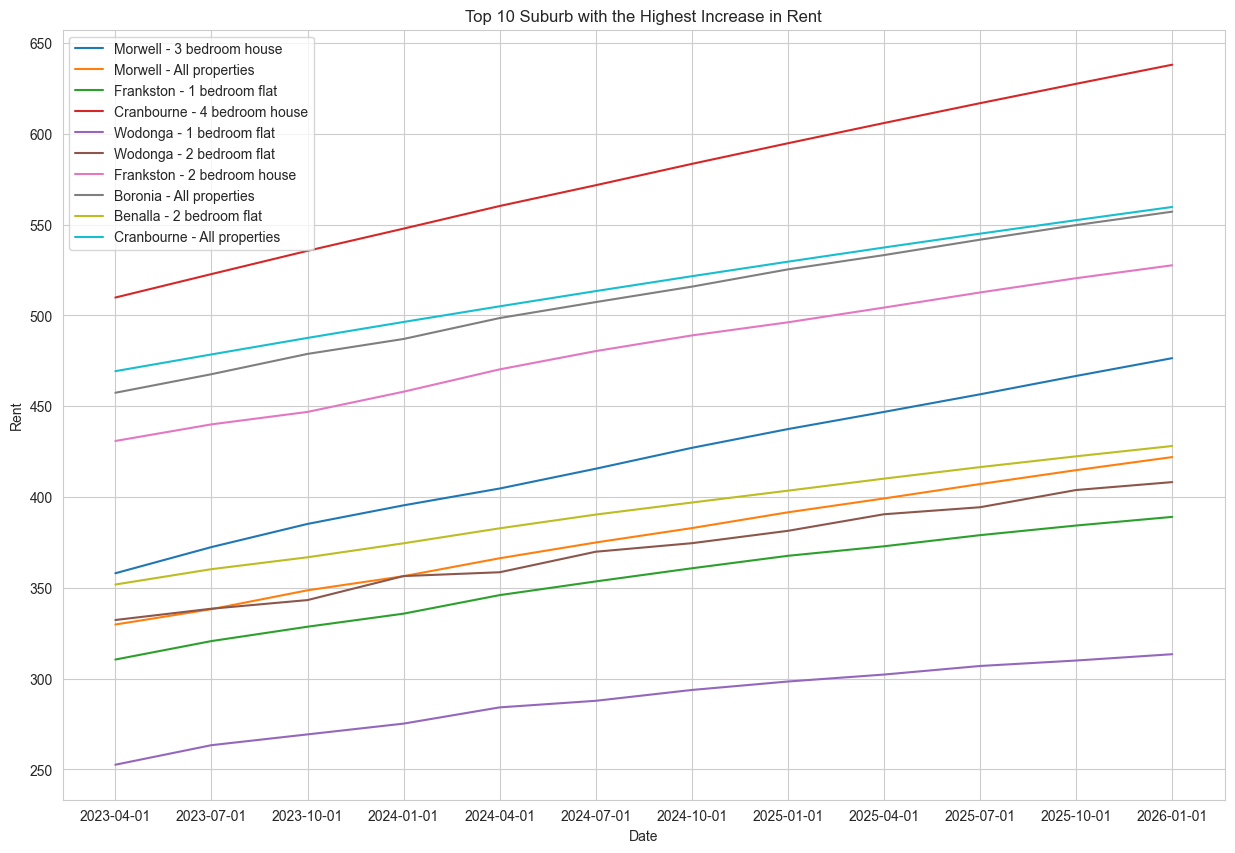

In [75]:
# Plot the rent over time for the top 10 suburb with the highest increase in rent
top_10 = result.nlargest(10, 'Rent_Diff')
fig, ax = plt.subplots(figsize=(15, 10))
for i in range(10):
    suburb = top_10.iloc[i]['suburb']
    type = top_10.iloc[i]['type']
    df_temp = df[(df['suburb'] == suburb) & (df['type'] == type)]
    ax.plot(df_temp['Date'], df_temp['Predicted_Median'], label=f'{suburb} - {type}')
    
ax.set_title('Top 10 Suburb with the Highest Increase in Rent')
ax.set_xlabel('Date')
ax.set_ylabel('Rent')
ax.legend()
plt.show()